# **Importing Data**

In [ ]:
import pandas as pd
import numpy as np
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("default")

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Technocolabs/Bondora_modeling.csv')

In [ ]:
df

,BidsPortfolioManager,BidsApi,BidsManual,VerificationType,LanguageCode,Age,Gender,Country,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Defaulted
0,0,0,115.0410,Unverified/Cross Referenced Phone,Estonian,61,Woman,Estonia,30.00,12,130.393314,Other,Vocational Education,Married,Fully Employed,UpTo3Years,Retail and Wholesale,Owner,10500.0,0,0.00,0,0.00,0.00,25,F,M,1,0.0000,0,0
1,0,0,140.6057,Unverified/Cross Referenced Phone,Estonian,48,Woman,Estonia,25.00,1,130.393314,Other,Higher Education,Divorced,Fully Employed,MoreThan5Years,Education,Owner,10800.0,0,0.00,0,0.00,0.00,15,F,M,2,258.6256,0,0
2,0,0,319.5580,Unverified/Cross Referenced Phone,Estonian,58,Woman,Estonia,25.00,20,130.393314,Home Improvement,Secondary Education,Married,Fully Employed,UpTo4Years,Mining,Owner,7000.0,0,0.00,0,0.00,0.00,25,F,M,0,0.0000,0,1
3,0,0,57.5205,Unverified/Cross Referenced Phone,Estonian,23,Woman,Estonia,45.00,15,130.393314,Loan Consolidation,Basic Education,Single,Not Specified,UpTo2Years,Other,Owner,11600.0,0,0.00,0,0.00,0.00,15,F,M,1,0.0000,0,0
4,0,0,319.5582,Unverified/Cross Referenced Phone,Estonian,25,Woman,Estonia,30.00,12,130.393314,Vehicle,Secondary Education,Cohabitant,Fully Employed,UpTo2Years,Retail and Wholesale,Owner,6800.0,0,0.00,0,0.00,0.00,25,F,M,1,0.0000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,2515,0,485.0000,Income Verified,Finnish,37,Male,Finland,31.01,60,107.680000,Loan Consolidation,Vocational Education,Single,Fully Employed,MoreThan5Years,Other,Council House,1400.0,1,500.00,0,7.69,792.32,1,E,M,0,0.0000,0,0
77390,1880,0,1120.0000,Income Verified,Finnish,35,Male,Finland,18.25,60,85.330000,Home Improvement,Vocational Education,Single,Fully Employed,MoreThan5Years,Transport and Warehousing,Owner,2265.0,5,1777.46,0,31.58,520.67,7,B,M,1,389.3600,0,0
77391,1975,0,525.0000,Income Unverified,Finnish,40,Male,Finland,24.83,60,80.420000,Loan Consolidation,Vocational Education,Married,Entrepreneur,MoreThan5Years,Construction,Owner,2500.0,2,1350.00,0,3.22,1069.58,1,D,M,0,0.0000,0,1
77392,1840,0,1160.0000,Income Expenses Verified,Estonian,47,Woman,Estonia,17.74,60,84.510000,Other,Higher Education,Married,Fully Employed,MoreThan5Years,Healthcare and SocialHelp,"Tenant, Unfurnished Property",540.0,8,732.05,2,44.35,50.49,1,B,M,1,96.8000,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77394 entries, 0 to 77393
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    77394 non-null  int64  
 1   BidsApi                                 77394 non-null  int64  
 2   BidsManual                              77394 non-null  float64
 3   VerificationType                        77394 non-null  object 
 4   LanguageCode                            77394 non-null  object 
 5   Age                                     77394 non-null  int64  
 6   Gender                                  77394 non-null  object 
 7   Country                                 77394 non-null  object 
 8   Interest                                77394 non-null  float64
 9   LoanDuration                            77394 non-null  int64  
 10  MonthlyPayment                          77394 non-null  fl

**Re-Converting Categorical Variables**

In [ ]:
cat_cols=['VerificationType','LanguageCode','Gender','Country','UseOfLoan','Education','MaritalStatus','EmploymentStatus',
          'EmploymentDurationCurrentEmployer','OccupationArea','HomeOwnershipType','Rating','CreditScoreEsMicroL','LoanDuration']

for col in cat_cols:
  df[col] = df[col].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77394 entries, 0 to 77393
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   BidsPortfolioManager                    77394 non-null  int64   
 1   BidsApi                                 77394 non-null  int64   
 2   BidsManual                              77394 non-null  float64 
 3   VerificationType                        77394 non-null  category
 4   LanguageCode                            77394 non-null  category
 5   Age                                     77394 non-null  int64   
 6   Gender                                  77394 non-null  category
 7   Country                                 77394 non-null  category
 8   Interest                                77394 non-null  float64 
 9   LoanDuration                            77394 non-null  category
 10  MonthlyPayment                          77394 

In [ ]:
# To test Modeling Performence with Random Forest after each step

def Test_Performence(X, y):

  X_train, X_test, y_train, y_test = train_test_split( X , y, stratify=y, random_state=0 )

  clf = RandomForestClassifier(random_state=0)

  clf.fit(X_train,y_train)

  print("Random Forest Test Set Accuracy: " , clf.score(X_test,y_test), "\n" )

  # To plot Feature Importance

  results = list(zip(X, clf.feature_importances_))

  importance = pd.DataFrame(results, columns = ["Feature", "Importance"])

  importance = importance.sort_values(by="Importance", ascending=False)

  plt.figure(figsize=[15,10])

  sns.barplot(x = importance.Importance, y = importance.Feature)

  plt.title("Random Forest Feature Importance")


# **Encoding Categorcial Features with Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for categoricals
for colname in df.select_dtypes(["object","category","bool"]):
    df[colname], _ = df[colname].factorize()

Random Forest Test Set Accuracy:  0.7489792754147501 



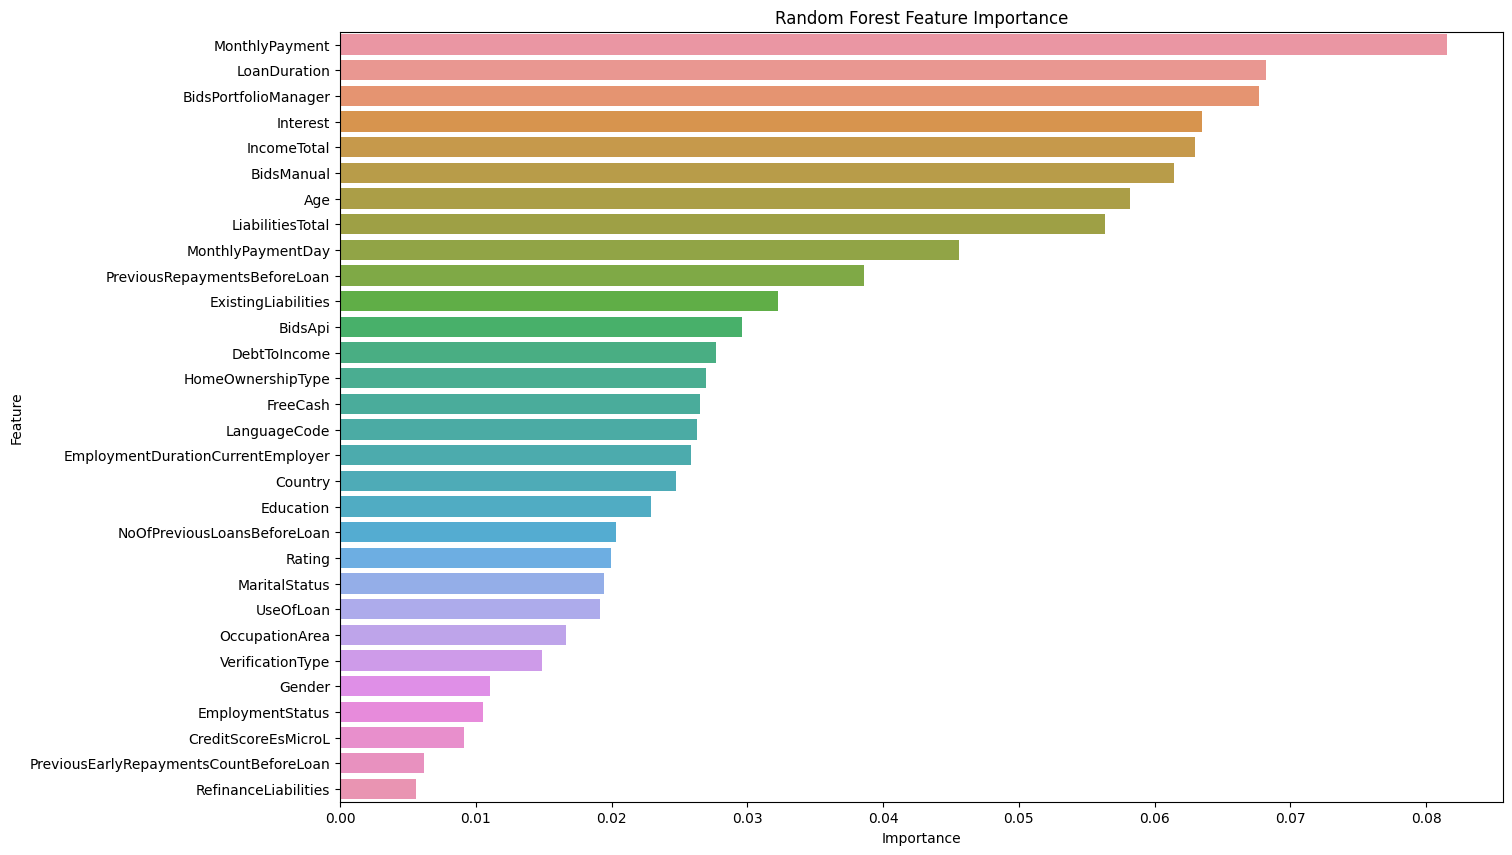

In [ ]:
X = df.copy()
y = X.pop("Defaulted")

Test_Performence(X, y)



---



# **Making Pipelines to test Performence**

In [ ]:
df

,BidsPortfolioManager,BidsApi,BidsManual,VerificationType,LanguageCode,Age,Gender,Country,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Defaulted
0,0,0,115.0410,0,0,61,0,0,30.00,0,130.393314,0,0,0,0,0,0,0,10500.0,0,0.00,0,0.00,0.00,25,0,0,1,0.0000,0,0
1,0,0,140.6057,0,0,48,0,0,25.00,1,130.393314,0,1,1,0,1,1,0,10800.0,0,0.00,0,0.00,0.00,15,0,0,2,258.6256,0,0
2,0,0,319.5580,0,0,58,0,0,25.00,2,130.393314,1,2,0,0,2,2,0,7000.0,0,0.00,0,0.00,0.00,25,0,0,0,0.0000,0,1
3,0,0,57.5205,0,0,23,0,0,45.00,3,130.393314,2,3,2,1,3,3,0,11600.0,0,0.00,0,0.00,0.00,15,0,0,1,0.0000,0,0
4,0,0,319.5582,0,0,25,0,0,30.00,0,130.393314,3,2,3,0,3,0,0,6800.0,0,0.00,0,0.00,0.00,25,0,0,1,0.0000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,2515,0,485.0000,3,3,37,1,1,31.01,22,107.680000,2,0,2,0,1,3,4,1400.0,1,500.00,0,7.69,792.32,1,3,0,0,0.0000,0,0
77390,1880,0,1120.0000,3,3,35,1,1,18.25,22,85.330000,1,0,2,0,1,6,0,2265.0,5,1777.46,0,31.58,520.67,7,6,0,1,389.3600,0,0
77391,1975,0,525.0000,2,3,40,1,1,24.83,22,80.420000,2,0,0,4,1,7,0,2500.0,2,1350.00,0,3.22,1069.58,1,4,0,0,0.0000,0,1
77392,1840,0,1160.0000,1,0,47,0,0,17.74,22,84.510000,0,1,0,0,1,9,1,540.0,8,732.05,2,44.35,50.49,1,6,0,1,96.8000,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler,PowerTransformer

Preprocessing_Pipeline = Pipeline([
    ("Scaler", StandardScaler() ),
    ("Transformer", PowerTransformer() ),
])

In [ ]:
X = df.copy()
y = X.pop("Defaulted")


X_train, X_test, y_train, y_test = train_test_split( X , y, stratify=y )

X_train = Preprocessing_Pipeline.fit_transform(X_train)

In [ ]:
X_train = pd.DataFrame(X_train, columns =df.drop(columns="Defaulted").columns)
X_train

,BidsPortfolioManager,BidsApi,BidsManual,VerificationType,LanguageCode,Age,Gender,Country,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,-0.558053,1.163328,1.022755,-0.706040,-1.047497,-0.772931,0.312221,-0.931607,-1.267886,-0.255580,0.219203,0.834041,-0.377686,0.843272,0.494010,-0.910186,0.616794,1.136522,1.473515,-1.426817,-1.362208,-0.350848,-0.766416,-0.704601,-0.387667,1.616251,-0.428778,-0.830349,0.711507,-0.243501
1,-1.306462,-0.565081,-0.810472,-0.706040,0.770239,-0.671595,0.312221,0.632161,0.230261,-0.255580,0.439389,0.834041,-1.441215,0.843272,0.494010,0.664790,0.616794,1.136522,0.516333,-0.754069,0.045737,-0.350848,-0.766416,-0.704601,-1.205812,0.423019,-0.428778,-0.830349,0.711507,-0.243501
2,-1.404954,-0.565081,1.464587,1.746594,-0.384934,-1.413211,0.312221,-0.931607,0.021885,-1.732142,-1.761504,-1.056003,-1.441215,-1.078188,-1.230831,0.664790,-1.368639,0.059008,-1.552613,0.249968,-0.853616,-0.350848,1.448594,1.112537,0.578365,-0.084508,-0.428778,-0.830349,-1.035929,-0.243501
3,-0.137163,2.357666,1.982347,-0.706040,-0.384934,0.547656,0.312221,-0.931607,-0.577379,0.825608,0.803604,0.834041,-0.377686,0.843272,0.494010,1.031985,0.616794,-1.184448,-0.539567,-1.426817,-1.362208,-0.350848,-0.766416,-0.704601,1.483198,-0.676570,-0.428778,-0.830349,-1.035929,-0.243501
4,-0.705947,-0.441730,-0.892664,-0.706040,-1.047497,-1.868015,0.312221,-0.931607,-0.172035,0.825608,-1.246708,0.834041,0.530123,0.843272,0.494010,0.664790,0.616794,0.059008,-0.539567,-0.195737,-1.007390,-0.350848,-0.766416,-0.704601,-1.205812,0.860710,-0.428778,-0.830349,0.711507,-0.243501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58040,-1.008626,-0.565081,0.660753,0.774899,-1.047497,-0.190983,-1.403237,-0.931607,-0.304786,-0.255580,-1.005485,0.834041,0.530123,0.843272,0.494010,1.928515,0.616794,0.059008,-1.670866,-1.426817,-1.362208,-0.350848,-0.766416,-0.704601,-0.235595,0.860710,-0.428778,-0.830349,0.711507,-0.243501
58041,0.540694,1.870517,1.460039,-0.706040,0.770239,0.547656,0.312221,0.632161,-0.152616,0.825608,0.323562,0.834041,-0.377686,0.843272,0.494010,-0.910186,0.616794,1.136522,1.547722,0.847414,1.757974,-0.350848,-0.766416,-0.704601,1.048426,0.860710,-0.428778,-0.830349,-1.035929,-0.243501
58042,1.647410,-0.565081,-1.183886,-0.706040,-1.047497,0.319248,0.312221,-0.931607,-0.321834,-0.255580,-1.761504,-1.195224,0.530123,-0.711741,-1.230831,-0.910186,-0.141742,1.387996,-0.892118,1.516096,0.457166,2.860944,1.495556,1.466905,0.578365,1.616251,-0.428778,1.721031,2.053160,-0.243501
58043,-0.362203,-0.565081,-1.161296,-0.706040,0.770239,1.163926,0.312221,0.632161,-1.986649,0.825608,-1.354087,0.834041,-1.441215,0.843272,0.494010,-0.910186,0.616794,1.136522,-0.719160,1.057293,0.885516,-0.350848,-0.766416,-0.704601,-0.867867,1.954668,-0.428778,1.449435,-0.933766,-0.243501


In [ ]:
Modeling_Pipeline = Pipeline([
    ("Classifier",RandomForestClassifier() ),
])

Modeling_Pipeline.fit(X_train,y_train)

Pipeline(steps=[('Classifier', RandomForestClassifier())])

In [ ]:
X_test = Preprocessing_Pipeline.transform(X_test)

X_test = pd.DataFrame(X_test, columns =df.drop(columns="Defaulted").columns)
X_test

,BidsPortfolioManager,BidsApi,BidsManual,VerificationType,LanguageCode,Age,Gender,Country,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,1.150906,0.387591,0.298482,0.774899,-0.384934,-0.377769,0.312221,-0.931607,-0.917649,-0.255580,-0.268710,0.834041,-0.377686,0.843272,0.494010,-0.910186,0.616794,-1.184448,0.078835,-1.426817,-1.362208,-0.350848,-0.766416,-0.704601,0.325055,-0.676570,-0.428778,-0.830349,-1.035929,-0.243501
1,-0.719257,1.610311,1.525668,0.774899,-0.384934,-1.413211,0.312221,-0.931607,-0.326301,0.825608,1.603376,0.834041,1.304490,0.843272,0.494010,0.664790,0.616794,0.059008,-0.061710,0.249968,-0.632915,-0.350848,-0.766416,-0.704601,1.159967,0.860710,-0.428778,1.852538,0.285728,-0.243501
2,-1.274916,-0.565081,-0.090041,-0.706040,0.770239,1.882655,0.312221,0.632161,0.378154,0.825608,0.817046,0.834041,2.006111,0.843272,0.494010,1.928515,0.616794,-1.184448,0.435727,-1.426817,-1.362208,-0.350848,-0.766416,-0.704601,-1.035180,0.423019,-0.428778,-0.830349,0.711507,-0.243501
3,-0.776985,-0.565081,0.220143,0.774899,0.770239,0.763023,0.312221,0.632161,0.368173,0.825608,0.439486,0.834041,-0.377686,0.843272,0.494010,1.031985,0.616794,0.499522,0.660340,-0.754069,-0.242360,-0.350848,-0.766416,-0.704601,1.483198,0.423019,-0.428778,-0.830349,0.711507,-0.243501
4,0.145399,2.460465,-1.161296,0.774899,-1.047497,-1.193916,0.312221,-0.931607,0.114795,1.577240,-0.860263,-0.439099,-1.441215,-1.078188,-1.230831,0.664790,-1.087554,-0.504855,0.558869,-0.195737,0.510319,-0.350848,0.103209,1.829587,0.578365,0.423019,-0.428778,-0.830349,-1.035929,-0.243501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19344,-0.845738,-0.565081,-0.521095,-0.706040,0.770239,-0.283420,0.312221,0.632161,1.089036,-0.255580,0.972161,0.834041,-1.441215,0.843272,0.494010,-0.910186,0.616794,1.136522,1.259855,0.249968,0.059131,-0.350848,-0.766416,-0.704601,0.578365,-1.338570,-0.428778,-0.830349,0.711507,-0.243501
19345,1.156842,-0.209051,0.001567,-0.706040,0.770239,0.074031,0.312221,0.632161,0.968520,1.577240,0.465559,0.834041,-1.441215,0.843272,0.494010,1.031985,0.616794,1.136522,0.897742,-1.426817,-1.362208,-0.350848,-0.766416,-0.704601,0.934718,-1.338570,-0.428778,-0.830349,-1.035929,-0.243501
19346,0.821693,-0.565081,-1.161296,-0.706040,0.770239,1.882655,0.312221,0.632161,1.089036,-0.255580,0.235752,0.834041,-0.377686,0.843272,0.494010,1.928515,0.616794,0.499522,0.558869,-1.426817,-1.362208,-0.350848,-0.766416,-0.704601,1.483198,-1.338570,-0.428778,-0.830349,0.711507,-0.243501
19347,0.438711,-0.565081,1.624326,1.746594,0.770239,0.473122,-1.403237,0.632161,-0.108890,-0.255580,0.102278,-0.439099,-0.377686,-1.078188,-1.230831,-1.612705,1.655474,-0.504855,1.747618,0.847414,1.832294,-0.350848,1.240607,1.878356,0.578365,1.616251,-0.428778,-0.830349,-1.035929,-0.243501


In [ ]:
Modeling_Pipeline.score(X_test, y_test)

0.7421055351697762

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, Modeling_Pipeline.predict(X_test)))

0.7421055351697762


In [ ]:
Modeling_Pipeline.predict(X_test)

array([1, 1, 1, ..., 1, 0, 1])

**With Reduced Features from RFE**

In [ ]:
Reduced_Cols = ['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'LanguageCode', 'Age',
       'Interest', 'LoanDuration', 'MonthlyPayment', 'Education',
       'MaritalStatus', 'EmploymentDurationCurrentEmployer',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'Rating', 'PreviousRepaymentsBeforeLoan']

reduced_X = df[Reduced_Cols]

In [ ]:
reduced_df = df.loc[:, Reduced_Cols ]
reduced_df

,BidsPortfolioManager,BidsApi,BidsManual,LanguageCode,Age,Interest,LoanDuration,MonthlyPayment,Education,MaritalStatus,EmploymentDurationCurrentEmployer,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,PreviousRepaymentsBeforeLoan
0,0,0,115.0410,0,61,30.00,0,130.393314,0,0,0,0,10500.0,0,0.00,0.00,0.00,25,0,0.0000
1,0,0,140.6057,0,48,25.00,1,130.393314,1,1,1,0,10800.0,0,0.00,0.00,0.00,15,0,258.6256
2,0,0,319.5580,0,58,25.00,2,130.393314,2,0,2,0,7000.0,0,0.00,0.00,0.00,25,0,0.0000
3,0,0,57.5205,0,23,45.00,3,130.393314,3,2,3,0,11600.0,0,0.00,0.00,0.00,15,0,0.0000
4,0,0,319.5582,0,25,30.00,0,130.393314,2,3,3,0,6800.0,0,0.00,0.00,0.00,25,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,2515,0,485.0000,3,37,31.01,22,107.680000,0,2,1,4,1400.0,1,500.00,7.69,792.32,1,3,0.0000
77390,1880,0,1120.0000,3,35,18.25,22,85.330000,0,2,1,0,2265.0,5,1777.46,31.58,520.67,7,6,389.3600
77391,1975,0,525.0000,3,40,24.83,22,80.420000,0,0,1,0,2500.0,2,1350.00,3.22,1069.58,1,4,0.0000
77392,1840,0,1160.0000,0,47,17.74,22,84.510000,1,0,1,1,540.0,8,732.05,44.35,50.49,1,6,96.8000


In [ ]:
X = reduced_df.copy()
#y = X.pop("Defaulted")


X_train, X_test, y_train, y_test = train_test_split( X , y, stratify=y )

X_train = Preprocessing_Pipeline.fit_transform(X_train)

In [ ]:
X_train = pd.DataFrame(X_train, columns =reduced_df.columns)
X_train

,BidsPortfolioManager,BidsApi,BidsManual,LanguageCode,Age,Interest,LoanDuration,MonthlyPayment,Education,MaritalStatus,EmploymentDurationCurrentEmployer,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,PreviousRepaymentsBeforeLoan
0,1.555228,2.461613,-1.157891,0.229902,-0.101602,0.014512,0.821466,2.047527,-0.379288,0.847400,1.362652,0.501691,0.820110,-0.760534,0.504723,-0.769951,-0.705339,1.165338,0.848526,-1.034313
1,-1.406683,-0.564119,1.908149,-1.044769,-0.875751,-1.175444,-1.733978,0.363290,-0.379288,-0.700917,0.670854,0.501691,-0.755746,-0.204155,-0.121607,1.158378,1.262818,-0.082592,-1.342883,-1.034313
2,0.363990,-0.564119,-1.157891,-1.044769,-1.635683,0.041104,-0.259240,-0.941808,-1.444184,-0.700917,-1.610430,-1.182871,-0.535469,0.579690,0.394854,1.387078,1.389875,-1.203682,-1.342883,-1.034313
3,-0.365149,-0.564119,-1.148827,-0.378187,-0.013274,0.282022,0.821466,-1.230515,0.530437,0.847400,-0.905270,0.501691,-1.800059,-0.760534,-0.594855,-0.769951,-0.705339,-0.230460,0.848526,0.707729
4,-1.314960,-0.564119,0.117820,-0.378187,1.476574,-1.400000,0.821466,-1.323510,-0.379288,0.847400,-0.905270,-1.182871,-1.271162,1.630783,0.153417,-0.769951,-0.705339,0.584113,1.607360,0.543545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58040,0.878318,-0.564119,0.543198,0.776200,-0.773033,0.930441,0.821466,0.513455,-0.379288,0.847400,1.037306,1.137331,0.843080,1.050855,0.871385,-0.769951,-0.705339,0.584113,0.410017,0.707729
58041,-1.346825,-0.564119,0.668848,-1.044769,-1.635683,0.336902,-1.859843,-0.729369,-0.379288,0.847400,1.037306,1.995462,1.418128,-0.760534,-0.867617,-0.769951,-0.705339,0.060365,0.848526,0.707729
58042,-0.887264,-0.564119,-0.083596,-0.378187,-1.085765,0.172889,1.573160,-1.279190,-0.379288,0.847400,0.670854,0.061588,-0.449094,0.241146,-0.437087,-0.769951,-0.705339,0.584113,0.848526,0.247136
58043,0.437994,-0.564119,-1.090463,1.282409,1.100037,-0.091066,1.573160,0.251193,0.530437,-1.070383,-0.283378,0.061588,-0.473012,-0.760534,-0.143647,0.660309,1.614335,1.896343,0.410017,-1.034313


In [ ]:
Modeling_Pipeline = Pipeline([
    ("Classifier",RandomForestClassifier() ),
])

Modeling_Pipeline.fit(X_train,y_train)

Pipeline(steps=[('Classifier', RandomForestClassifier())])

In [ ]:
X_test = Preprocessing_Pipeline.transform(X_test)

X_test = pd.DataFrame(X_test, columns =reduced_df.columns)
X_test

,BidsPortfolioManager,BidsApi,BidsManual,LanguageCode,Age,Interest,LoanDuration,MonthlyPayment,Education,MaritalStatus,EmploymentDurationCurrentEmployer,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,PreviousRepaymentsBeforeLoan
0,-1.406683,-0.564119,1.221283,-0.378187,-1.635683,-1.377199,-1.908921,0.363290,1.307077,-1.539093,0.242171,0.061588,-1.029380,-1.429527,-1.324237,-0.769951,-0.705339,0.584113,-1.342883,0.671691
1,-0.815643,-0.564119,-0.657272,0.776200,2.054172,-0.360493,0.821466,-1.259412,2.011159,0.847400,1.930967,0.501691,-0.168617,1.050855,0.701556,-0.769951,-0.705339,-0.864488,0.848526,0.466124
2,1.367394,1.986672,-1.157891,-1.044769,-0.671903,0.066686,-0.259240,0.957971,1.307077,-1.070383,-0.905270,0.061588,-0.908484,0.241146,0.446749,1.762538,-0.689380,-0.082592,0.410017,0.027477
3,-0.790175,-0.564119,-0.196274,0.776200,1.998715,1.096495,-0.259240,0.239113,-1.444184,0.847400,1.930967,1.995462,0.408065,-1.429527,-1.324237,-0.769951,-0.705339,1.488142,-0.097157,0.707729
4,-0.187030,-0.564119,0.131335,1.282409,-0.773033,-0.091066,0.821466,-0.823071,-1.444184,-1.070383,1.037306,0.061588,0.085221,-0.204155,0.669391,1.217599,1.677412,-1.555772,0.410017,1.193134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19344,-0.458708,-0.564119,0.521750,0.776200,0.318217,1.096495,-0.259240,0.775511,-1.444184,0.847400,1.037306,1.137331,1.368996,-0.760534,-0.083500,-0.769951,-0.705339,0.940298,-1.342883,0.707729
19345,1.054740,-0.564119,-1.180650,-0.378187,-0.572411,-0.239001,-1.859843,0.363290,-0.379288,-0.700917,-0.905270,-1.182871,-0.710761,1.050855,0.606518,1.690619,0.364799,-0.082592,-0.686262,-1.034313
19346,-0.827468,2.467583,-1.157891,1.282409,-0.875751,2.412911,-1.908921,0.060518,0.530437,-1.070383,0.242171,0.061588,-0.716348,-0.760534,-0.143647,0.658821,1.478276,-1.555772,-0.097157,-1.034313
19347,-0.371834,-0.564119,-0.760042,0.776200,1.655628,1.096495,-0.259240,0.170882,1.307077,0.847400,-0.905270,-1.182871,1.347473,-0.760534,-0.138119,-0.769951,-0.705339,-1.032397,-0.097157,0.707729


In [ ]:
Modeling_Pipeline.score(X_test, y_test)

0.7460850689958137

In [ ]:
print(accuracy_score(y_test, Modeling_Pipeline.predict(X_test)))

0.7460850689958137


In [ ]:
Modeling_Pipeline.predict(X_test)

array([0, 1, 1, ..., 1, 1, 1])

# **Random Forest Model**

In [ ]:
X = reduced_df.copy()
#y = X.pop("Defaulted")


X_train, X_test, y_train, y_test = train_test_split( X , y, test_size=0.2 ,stratify=y )

X_train = Preprocessing_Pipeline.fit_transform(X_train)
X_train

array([[ 1.10149421, -0.56526156,  1.29842241, ...,  0.69868835,
         0.85460298, -1.03608786],
       [ 1.10836361,  0.85210608, -1.15759865, ..., -1.55521191,
        -0.09102413, -1.03608786],
       [-1.0175999 , -0.56526156,  0.09761366, ..., -1.55521191,
        -0.09102413,  0.94119359],
       ...,
       [ 0.61123935, -0.56526156,  0.79011899, ..., -1.55521191,
         0.85460298, -1.03608786],
       [ 0.89550498, -0.56526156,  1.35688933, ...,  1.68839735,
        -0.09102413, -1.03608786],
       [-0.82771432,  2.12599189, -0.35570257, ...,  1.88989168,
         0.85460298,  1.92396334]])

In [ ]:
pd.DataFrame(X_train, columns =reduced_df.columns)

,BidsPortfolioManager,BidsApi,BidsManual,LanguageCode,Age,Interest,LoanDuration,MonthlyPayment,Education,MaritalStatus,EmploymentDurationCurrentEmployer,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,PreviousRepaymentsBeforeLoan
0,1.101494,-0.565262,1.298422,0.768432,1.160632,-0.503396,-0.265293,0.708750,-0.369931,-1.541289,0.236863,-1.184809,1.075940,0.243155,1.152413,1.076805,2.215177,0.698688,0.854603,-1.036088
1,1.108364,0.852106,-1.157599,1.280325,-0.287128,1.572665,0.822630,0.728064,-0.369931,-1.078424,-0.908660,-1.184809,0.018954,0.243155,0.764064,1.515850,1.146079,-1.555212,-0.091024,-1.036088
2,-1.017600,-0.565262,0.097614,1.280325,-1.194854,1.417686,-1.738813,-0.730059,-0.369931,0.843830,0.236863,0.059703,-0.062281,0.243155,-0.375628,-0.767745,-0.616818,-1.555212,-0.091024,0.941194
3,-1.407359,-0.565262,0.927883,-1.049215,0.896858,-0.986843,-1.863660,-1.762604,0.538632,-1.541289,-0.908660,-1.184809,-1.315294,0.581642,-0.707944,1.265442,1.052787,0.577211,-1.341872,0.346293
4,-0.353507,-0.565262,-1.175716,-1.049215,-1.087758,-1.435892,0.822630,-1.328443,1.312069,0.843830,-1.611660,0.500509,-1.304307,1.051971,0.098449,-0.767745,-0.616818,1.688397,1.611523,1.761045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61910,0.336525,-0.565262,0.402929,0.768432,-0.574941,1.092102,-0.265293,1.142951,-1.437581,0.843830,-0.908660,1.138081,0.925420,0.243155,-0.018693,-0.767745,-0.616818,-1.555212,-1.341872,0.709867
61911,-0.474901,-0.565262,-0.867372,1.280325,-0.194861,1.358886,0.822630,-0.978784,-0.369931,0.843830,-0.908660,1.138081,1.075940,-0.202535,1.086886,-0.767745,-0.616818,-1.034619,-0.091024,0.412025
61912,0.611239,-0.565262,0.790119,0.768432,-0.477235,-0.744952,0.822630,-0.217220,1.312069,-1.541289,-1.611660,0.059703,1.010585,-0.202535,0.826222,0.351663,2.358116,-1.555212,0.854603,-1.036088
61913,0.895505,-0.565262,1.356889,0.768432,-1.524502,-0.104751,0.822630,-1.762604,0.538632,-1.078424,0.665484,0.059703,1.239278,-0.202535,0.829603,-0.008391,2.511668,1.688397,-0.091024,-1.036088


In [ ]:
X_test = Preprocessing_Pipeline.transform(X_test)
X_test

array([[ 0.37190675, -0.56526156,  1.08747327, ...,  0.93325641,
        -1.34187156,  1.95379504],
       [-1.40735863, -0.56526156, -0.07495338, ...,  0.57721089,
        -1.34187156, -0.26549908],
       [ 0.08999398, -0.56526156,  1.23725606, ..., -1.55521191,
        -0.09102413, -1.03608786],
       ...,
       [-1.09191011, -0.56526156,  0.37177906, ...,  0.81727542,
        -1.34187156,  0.70986659],
       [ 2.14435982,  2.36384278, -1.15759865, ..., -0.08852371,
         0.41650578, -1.03608786],
       [ 0.09398904, -0.56526156,  1.1228793 , ..., -1.20503681,
         0.41650578,  0.70986659]])

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(X_test.shape)

(61915, 20)
(61915,)
(15479, 20)
(15479, 20)


In [ ]:
RF_Main_Pipeline=Pipeline([
    ("Scaler", StandardScaler() ),
    ("Transformer", PowerTransformer() ),
    ("Classifier",RandomForestClassifier() )
])

**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold

kf = StratifiedKFold(n_splits= 10 , shuffle=True, random_state=0)

CV_Scores = cross_val_score(RF_Main_Pipeline, X, y , cv=kf)

print('Cross-Validation Accuracy Scores', CV_Scores)

Cross-Validation Accuracy Scores [0.74651163 0.7379845  0.74573643 0.73940568 0.73484946 0.74777103
 0.74428221 0.75255201 0.75022613 0.74156868]


In [ ]:
CV_Scores = pd.Series(CV_Scores)

CV_Scores.min(), CV_Scores.mean(), CV_Scores.max()

(0.7348494637550071, 0.7440887758335328, 0.7525520093035276)

**Grid Search Hypertuning**

In [ ]:
from sklearn.model_selection import GridSearchCV


n_estimators = [50,100,500] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [None,10,30] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6] # minimum sample number to split a node
min_samples_leaf = [1, 3] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

Param_Grid = {
              "n_estimators": n_estimators,
              "max_features" : max_features,
              "max_depth" : max_depth,
              "min_samples_split" : min_samples_split ,
              "min_samples_leaf" : min_samples_leaf,
              }

rf = RandomForestClassifier()

Grid_Model = GridSearchCV(rf, Param_Grid , cv=2, verbose=1, n_jobs = -1)

In [ ]:
Grid_Model.fit(X_train, y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 6],
                         'n_estimators': [50, 100, 500]},
             verbose=1)

In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

display(Grid_Model)        

Best parameters are: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


0.729 + or -0.001 for the {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.733 + or -0.002 for the {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.735 + or -0.003 for the {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
0.73 + or -0.003 for the {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 50}
0.733 + or -0.002 for the {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}
0.734 + or -0.003 for the {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 500}
0.731 + or -0.002 for the {'max_depth': No

In [ ]:
Grid_Model.best_score_

0.7353952709835403

In [ ]:
Grid_Model.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
Grid_Model.best_estimator_

RandomForestClassifier(max_depth=30, n_estimators=500)

In [ ]:
Grid_Model.score(X_test, y_test)

0.7468828735706441

50 None
100 10
300 30
500 50


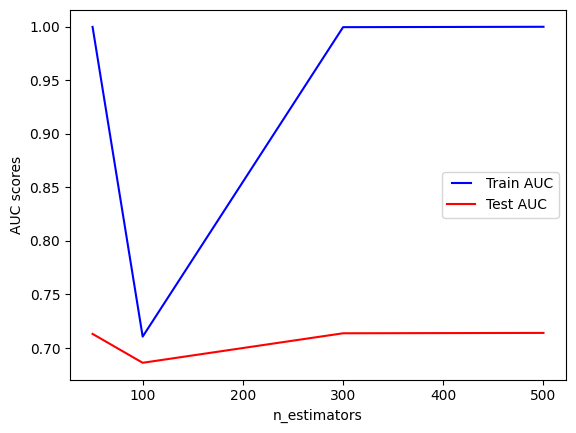

In [ ]:
from sklearn.metrics import auc,roc_curve

n_estimators=[50,100,300,500]

max_depth=[None,10,30,50,100]

train_results=[]

test_results=[]

for est,dep in zip(n_estimators,max_depth):
  print(est,dep)

  rf=RandomForestClassifier(n_estimators=est, max_features="log2", n_jobs=-1 ,max_depth=dep)

  rf.fit(X_train,y_train)
  train_pred=rf.predict(X_train)
  false_pos_rate,true_pos_rate,threshold = roc_curve(y_train,train_pred)
  roc_auc= auc(false_pos_rate,true_pos_rate)
  train_results.append(roc_auc)

  test_pred=rf.predict(X_test)
  false_pos_rate,true_pos_rate,threshold= roc_curve(y_test,test_pred)
  roc_auc=auc(false_pos_rate,true_pos_rate)
  test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators,train_results,"b",label="Train AUC")
line2, = plt.plot(n_estimators,test_results,"r",label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC scores')
plt.xlabel('n_estimators')
plt.show()

**Randomized Search Hypertuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [50,100,300,500,700,1000] # number of trees in the random forest
max_features = ['auto', 'sqrt','log2'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)] # maximum number of levels allowed in each decision tree
min_samples_split = [ 2, 4, 6, 10] # minimum sample number to split a node
min_samples_leaf = [ 1, 3, 4, 5] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

Param_Grid = {"bootstrap" : [True, False],
              "n_estimators": n_estimators,
              "max_features" : max_features,
              "max_depth" : max_depth,
              "min_samples_split" : min_samples_split ,
              "min_samples_leaf" : min_samples_leaf,
              }

rf = RandomForestClassifier()

Randomized_Model = RandomizedSearchCV(rf, Param_Grid , n_iter=20 ,cv=kf, verbose=1 ,n_jobs = -1)

In [ ]:
Randomized_Model.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4, 5],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [50, 100, 300, 500, 700,
                                                         1000]},
                   verbose=1)

In [ ]:
Randomized_Model.best_score_

0.7436488487497689

In [ ]:
Randomized_Model.best_params_

{'n_estimators': 500,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 40,
 'bootstrap': False}

In [ ]:
rf = Randomized_Model.best_estimator_
rf

RandomForestClassifier(bootstrap=False, max_depth=40, max_features='log2',
                       min_samples_leaf=3, min_samples_split=6,
                       n_estimators=500)

In [ ]:
RF_Modeling_Pipeline = Pipeline([
    ("Classifier", rf ),
])
RF_Modeling_Pipeline["Classifier"].get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
RF_Modeling_Pipeline.score(X_test,y_test)

0.7499192454292913

**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold

kf = StratifiedKFold(n_splits= 10 , shuffle=True, random_state=0)

CV_Scores = cross_val_score(RF_Modeling_Pipeline, X_train, y_train , cv=kf)

print('Cross-Validation Accuracy Scores', CV_Scores)

Cross-Validation Accuracy Scores [0.7372416  0.73966408 0.74644703 0.7375646  0.73594961 0.74737522
 0.75351316 0.75399774 0.74026813 0.74543692]


In [ ]:
CV_Scores = pd.Series(CV_Scores)

CV_Scores.min(), CV_Scores.mean(), CV_Scores.max()

(0.7359496124031008, 0.7437458105810844, 0.7539977386528832)

> When testing Random Forest model upon cross validation, we get a maximum accuracy of 75%.





# **Evaluating Random Forest Model**

In [ ]:
y_pred_rf_probs = RF_Modeling_Pipeline.predict_proba(X_test)[:, 1]

y_pred_rf = RF_Modeling_Pipeline.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_rf))

0.7499192454292913


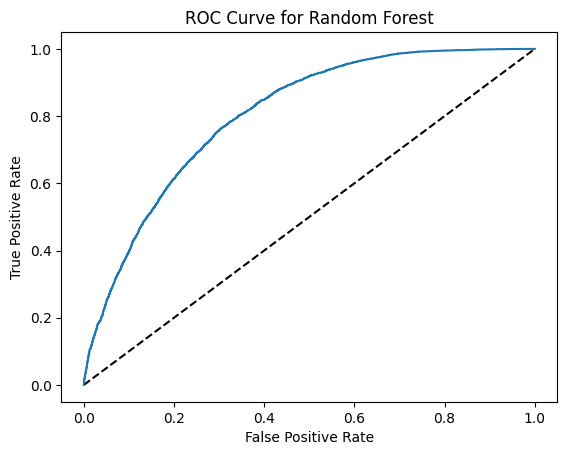

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_pred_rf_probs))

0.8034050841315721


Text(50.722222222222214, 0.5, 'True labels')

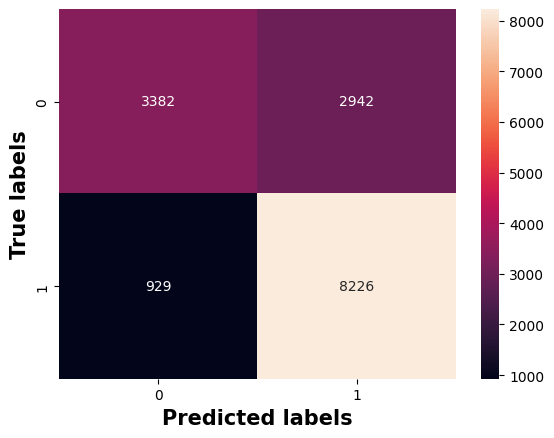

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt='g')
plt.xlabel('Predicted labels',fontsize=15, fontweight='bold')
plt.ylabel('True labels', fontsize=15, fontweight='bold')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.53      0.64      6324
           1       0.74      0.90      0.81      9155

    accuracy                           0.75     15479
   macro avg       0.76      0.72      0.72     15479
weighted avg       0.76      0.75      0.74     15479



# **Logistic Regression Model**

**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

LR_Main_Pipeline = Pipeline([
    ("Scaler", StandardScaler() ),
    ("Transformer", PowerTransformer() ),
    ("Classifier",LogisticRegression() )
])

In [ ]:
kf = StratifiedKFold(n_splits= 10 , shuffle=True, random_state=0)

CV_Scores = cross_val_score(LR_Main_Pipeline, X, y, cv=kf)

print('Cross-Validation Accuracy Scores', CV_Scores)

Cross-Validation Accuracy Scores [0.68863049 0.69082687 0.69289406 0.69095607 0.68665202 0.69052849
 0.69065771 0.70009045 0.68833183 0.69569712]


In [ ]:
CV_Scores = pd.Series(CV_Scores)
CV_Scores.min(), CV_Scores.mean(), CV_Scores.max()

(0.6866520222250937, 0.6915265110803264, 0.7000904509626567)

**Grid Search Hypertuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters_lr = [{'penalty':['none', 'elasticnet', 'l1', 'l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]

lr = LogisticRegression()

grid_search_lr = GridSearchCV(estimator = lr,
                           param_grid = parameters_lr,
                           scoring = 'accuracy',
                           cv = kf,
                           verbose=1,
                           n_jobs = -1)

grid_search_lr.fit(X_train, y_train)

best_accuracy_lr = grid_search_lr.best_score_

best_paramaeter_lr = grid_search_lr.best_params_  

print("Best Accuracy of LR: {:.2f} %".format(best_accuracy_lr.mean()*100))
print("Best Parameter of LR:", best_paramaeter_lr)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
Best Accuracy of LR: 69.16 %
Best Parameter of LR: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
LR_Modeling_Pipeline = grid_search_lr.best_estimator_

LR_Modeling_Pipeline.fit(X_train,y_train)

LogisticRegression(C=0.001)

In [ ]:
LR_Modeling_Pipeline.score(X_test, y_test)

0.6956521739130435

**Cross validation**

In [ ]:
kf = StratifiedKFold(n_splits= 10 , shuffle=True, random_state=0)

CV_Scores = cross_val_score(LR_Modeling_Pipeline, X_train, y_train, cv=kf)

print('Cross-Validation Accuracy Scores', CV_Scores)

Cross-Validation Accuracy Scores [0.68992248 0.67829457 0.69460594 0.68410853 0.687823   0.69714101
 0.69875626 0.70069456 0.6885802  0.69584881]


In [ ]:

CV_Scores = pd.Series(CV_Scores)
CV_Scores.min(), CV_Scores.mean(), CV_Scores.max()

(0.6782945736434108, 0.6915775358662257, 0.7006945566144404)

> When testing logistic regression model upon cross validation, we get a maximum accuracy of 70%.





# **Evaluating Logistic Regression Model**

In [ ]:
y_pred_lr_probs = LR_Modeling_Pipeline.predict_proba(X_test)[:, 1]

y_pred_lr = LR_Modeling_Pipeline.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_lr))

0.6956521739130435


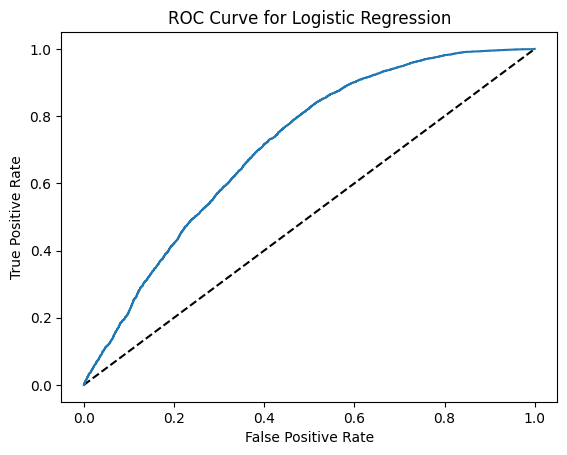

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score,classification_report

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.show()

In [ ]:
print(roc_auc_score(y_test,y_pred_lr_probs))

0.7105071108269245


Text(50.722222222222214, 0.5, 'True labels')

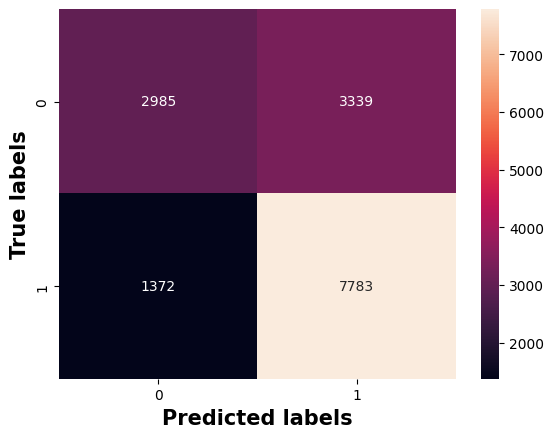

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

cm_rf = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm_rf, annot=True, fmt='g')
plt.xlabel('Predicted labels',fontsize=15, fontweight='bold')
plt.ylabel('True labels', fontsize=15, fontweight='bold')

In [ ]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.69      0.47      0.56      6324
           1       0.70      0.85      0.77      9155

    accuracy                           0.70     15479
   macro avg       0.69      0.66      0.66     15479
weighted avg       0.69      0.70      0.68     15479



# **Saving Best Model**

In [ ]:
import pickle

pickle.dump(r , open('r.pkl', 'wb'))

In [ ]:
r = RandomForestClassifier()

In [ ]:
r.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
r.score(X_test, y_test)